Import Necessary Libraries

In [1]:
import numpy as np                 
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns  

In [3]:
benin = r"C:\Users\fikad\Desktop\10acedamy\week_0\Data\solar-_benin.csv"
data = pd.read_csv(benin, encoding='latin1') 
data.head()

C:\Users\fikad\AppData\Local\Temp\ipykernel_6148\3047750542.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(benin, encoding='latin1')


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,yyyy-mm-dd hh:mm,W/m²,W/m²,W/m²,W/m²,W/m²,°C,%,m/s,m/s,m/s,°N (to east),°,hPa,1 or 0,mm/min,°C,°C,NaN
1,2021-08-13 00:01,-0.9,NAN,NAN,0,0,22.6,98.3,1.5,2.1,0.4,230,6.5,974,0,0,23.2,23.3,"Solar tracker not aligned, no DNI and DHI meas..."
2,2021-08-13 00:02,-0.9,NAN,NAN,0,0,22.6,98.3,0.9,1.6,0.6,216.6,4.8,974,0,0,23.2,23.3,"Solar tracker not aligned, no DNI and DHI meas..."
3,2021-08-13 00:03,-0.9,NAN,NAN,0,0,22.6,98.4,1.3,1.9,0.6,227.1,8,975,0,0,23.2,23.3,"Solar tracker not aligned, no DNI and DHI meas..."
4,2021-08-13 00:04,-0.9,NAN,NAN,0,0,22.6,98.4,1,1.9,0.7,227.9,9.1,974,0,0,23.2,23.3,"Solar tracker not aligned, no DNI and DHI meas..."


Data Exploration and Visualization

In [10]:
data.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525596,2022-08-12 23:56,-1.0,-0.1,-1.0,0.0,0.0,23.3,92.8,1.3,2.1,0.5,237.6,7.8,974,0,0,24.1,24.1,NaN
525597,2022-08-12 23:57,-1.0,-0.1,-1.0,0.0,0.0,23.4,92.8,1.5,1.9,0.4,229.4,9.1,974,0,0,24.1,24.1,NaN
525598,2022-08-12 23:58,-1.0,-0.1,-1.0,0.0,0.0,23.4,92.8,1.9,2.6,0.5,237.4,16.5,974,0,0,24.1,24.1,NaN
525599,2022-08-12 23:59,-1.0,-0.1,-1.0,0.0,0.0,23.4,92.8,2.2,3.1,0.5,244.8,9.8,974,0,0,24.1,24.1,NaN
525600,2022-08-13 00:00,-1.0,-0.1,-1.0,0.0,0.0,23.4,92.8,1.8,2.6,0.5,236.0,9.2,974,0,0,24.1,24.1,NaN


In [11]:
data.shape

(525601, 19)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Timestamp      525601 non-null  object
 1   GHI            525601 non-null  object
 2   DNI            525601 non-null  object
 3   DHI            525601 non-null  object
 4   ModA           525601 non-null  object
 5   ModB           525601 non-null  object
 6   Tamb           525601 non-null  object
 7   RH             525601 non-null  object
 8   WS             525601 non-null  object
 9   WSgust         525601 non-null  object
 10  WSstdev        525601 non-null  object
 11  WD             525601 non-null  object
 12  WDstdev        525601 non-null  object
 13  BP             525601 non-null  object
 14  Cleaning       525601 non-null  object
 15  Precipitation  525601 non-null  object
 16  TModA          525601 non-null  object
 17  TModB          525601 non-null  object
 18  Comm

In [13]:
data.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525601,525601.0,525601,525601,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601.0,525601,525601.0,525601.0,525601.0,77760
unique,525601,16655.0,12250,11497,18620.0,16631.0,389.0,1442.0,222.0,139.0,69.0,7093.0,1107.0,29.0,6,44.0,1128.0,1014.0,1
top,yyyy-mm-dd hh:mm,-1.6,NAN,NAN,0.0,0.0,22.9,100.0,0.0,2.6,0.5,0.0,0.0,971.0,0,0.0,22.6,22.6,"Solar tracker not aligned, no DNI and DHI meas..."
freq,1,7415.0,77760,77760,200206.0,200552.0,5945.0,4653.0,32766.0,32723.0,101746.0,30130.0,32622.0,85014.0,459583,456841.0,5555.0,5810.0,77760


In [15]:
data.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         447841
dtype: int64

In [39]:
data.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA               1187
ModB               1149
Tamb                  0
RH                    0
WS                 1033
WSgust             1033
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         447841
datetime         525601
month                 0
day              525601
hour             525601
dtype: int64

In [16]:
data.dtypes

Timestamp        object
GHI              object
DNI              object
DHI              object
ModA             object
ModB             object
Tamb             object
RH               object
WS               object
WSgust           object
WSstdev          object
WD               object
WDstdev          object
BP               object
Cleaning         object
Precipitation    object
TModA            object
TModB            object
Comments         object
dtype: object

In [ ]:
columns_to_check_positive = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

negative_values_count = {
    col: (pd.to_numeric(data[col], errors='coerce') < 0).sum()
    for col in columns_to_check_positive if col in data.columns
}
negative_values_count


{'GHI': 262165,
 'DNI': 233397,
 'DHI': 224834,
 'ModA': 0,
 'ModB': 0,
 'WS': 0,
 'WSgust': 0}

In [22]:
columns_to_check_positive = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

negative_values_count = {
    col: (pd.to_numeric(data[col], errors='coerce') < 0).sum()
    for col in columns_to_check_positive if col in data.columns
}
negative_values_count


{'GHI': 262165,
 'DNI': 233397,
 'DHI': 224834,
 'ModA': 0,
 'ModB': 0,
 'WS': 0,
 'WSgust': 0}

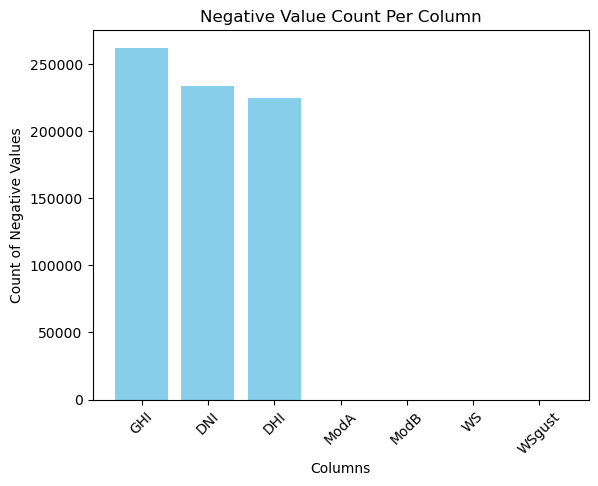

In [23]:
plt.bar(negative_values_count.keys(), negative_values_count.values(), color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Count of Negative Values')
plt.title('Negative Value Count Per Column')
plt.xticks(rotation=45)
plt.show()


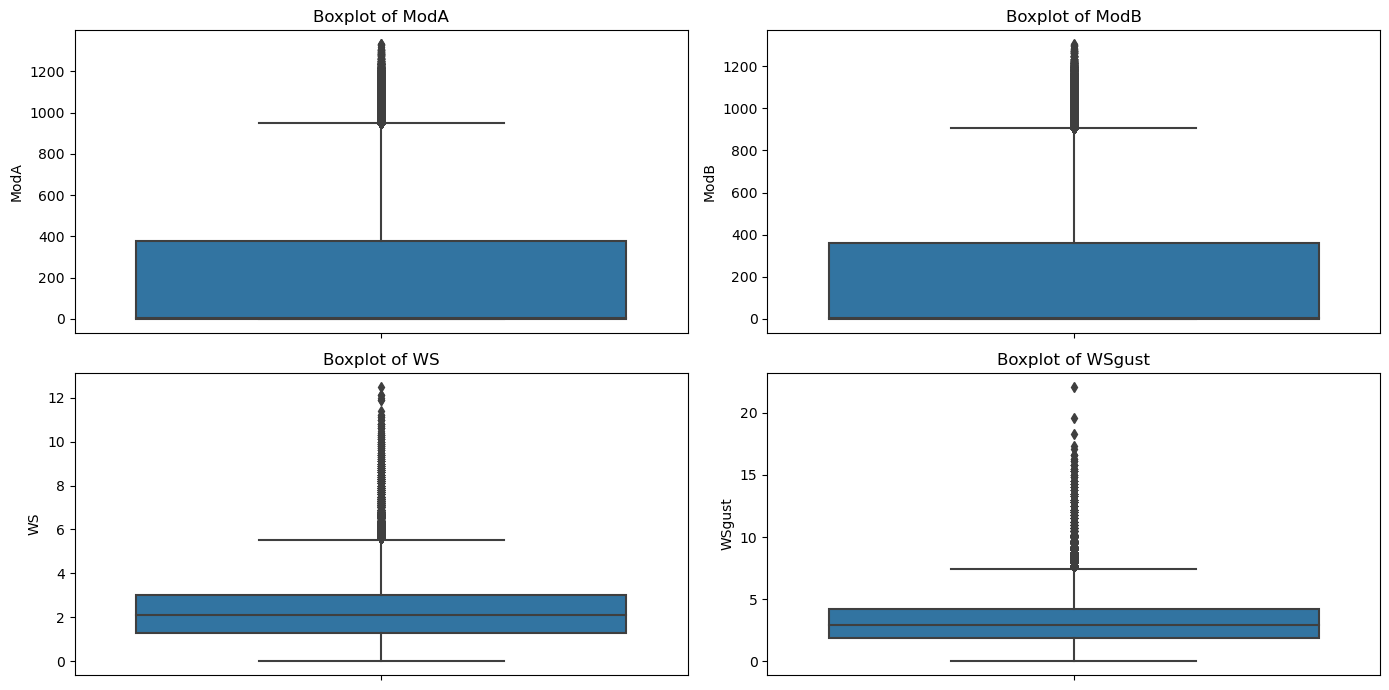

In [24]:
columns_to_check_outliers = ['ModA', 'ModB', 'WS', 'WSgust']

data[columns_to_check_outliers] = data[columns_to_check_outliers].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(14, 7))
for i, col in enumerate(columns_to_check_outliers, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col])  
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


GHI      0
DNI      0
DHI      0
TModA    0
TModB    0
dtype: int64


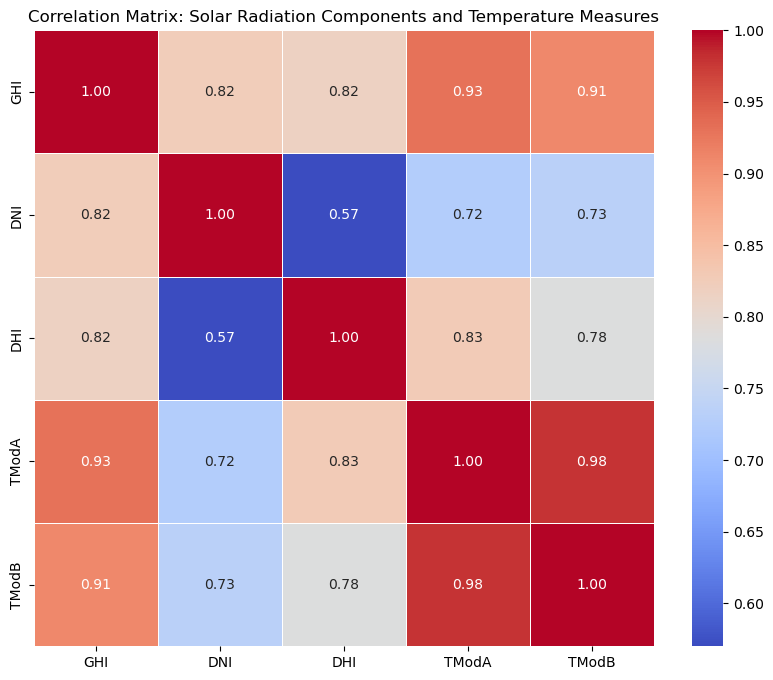

In [38]:
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_data = data[corr_columns].corr()
data[corr_columns] = data[corr_columns].apply(pd.to_numeric, errors='coerce')
print(data[corr_columns].isna().sum())  # Check for any NaNs
data[corr_columns] = data[corr_columns].fillna(data[corr_columns].mean()) 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix: Solar Radiation Components and Temperature Measures')
plt.show()



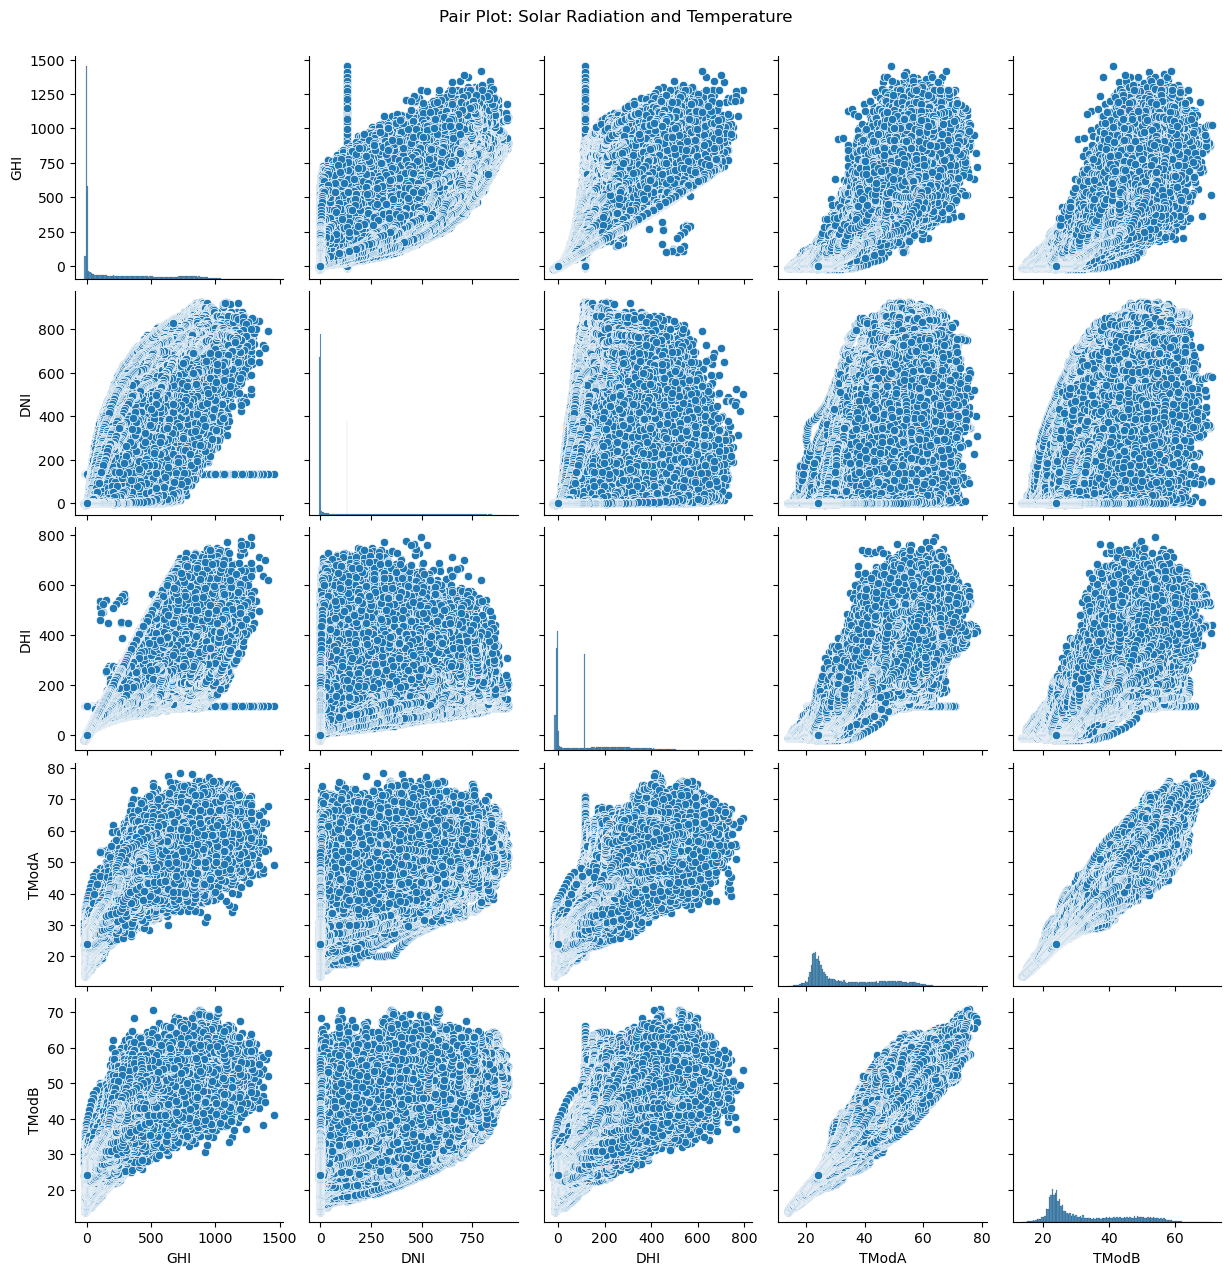

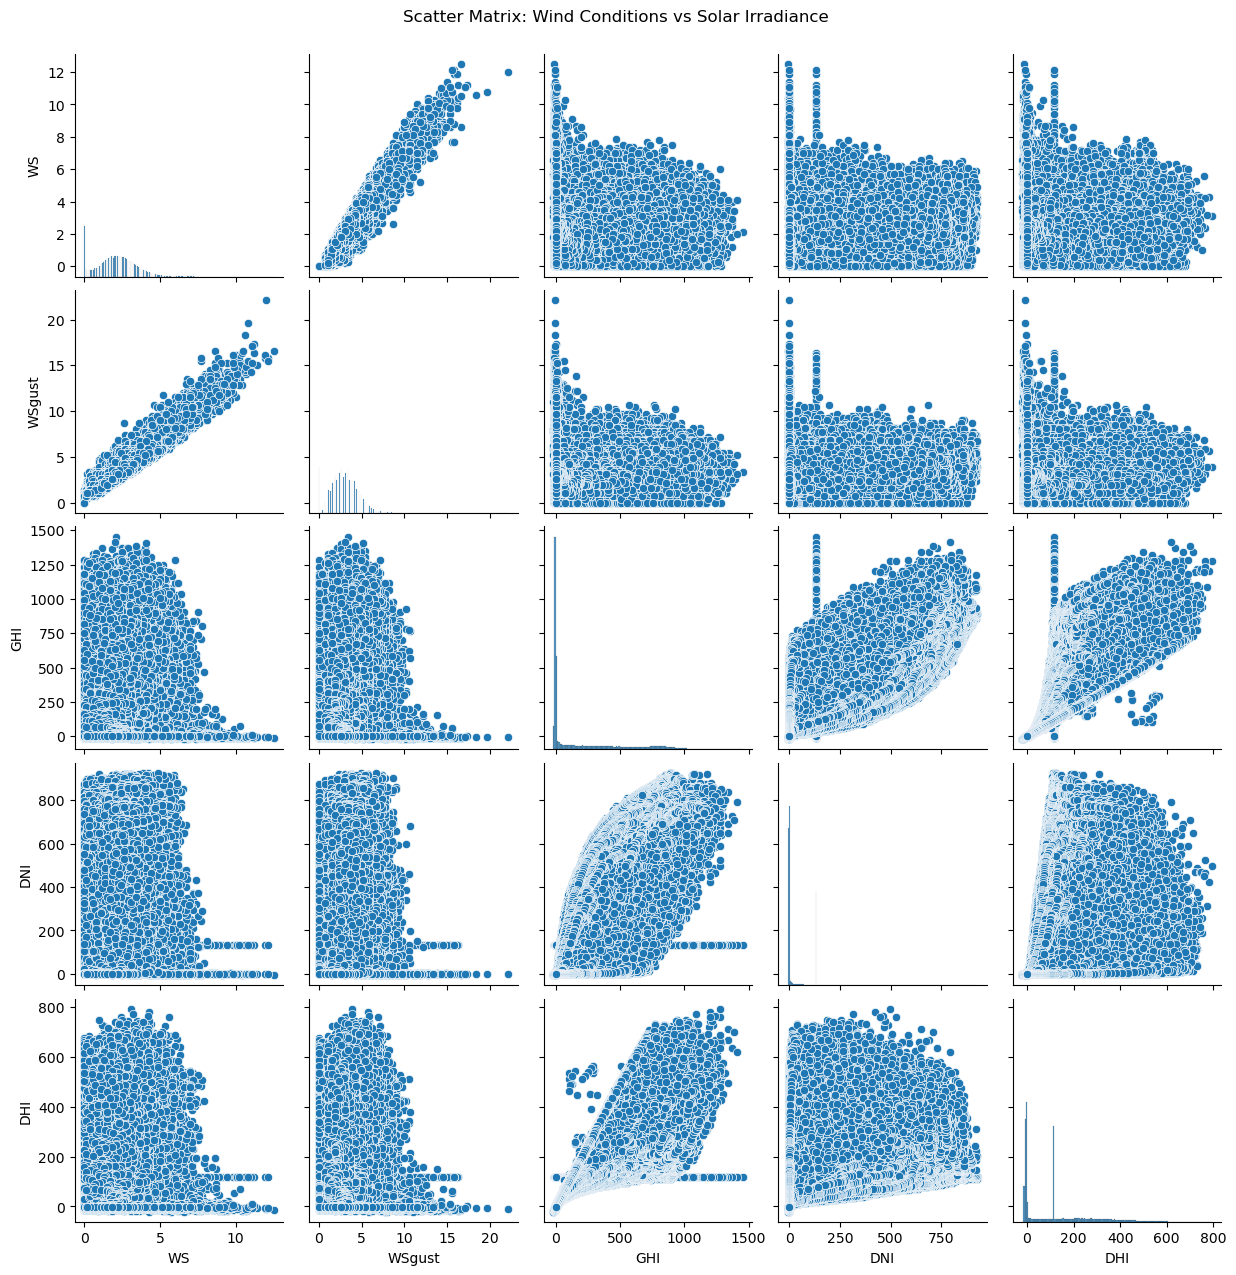

C:\Users\hp\AppData\Local\Temp\ipykernel_5260\3671562790.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_wind_irradiance = data[wind_irradiance_columns].corr()


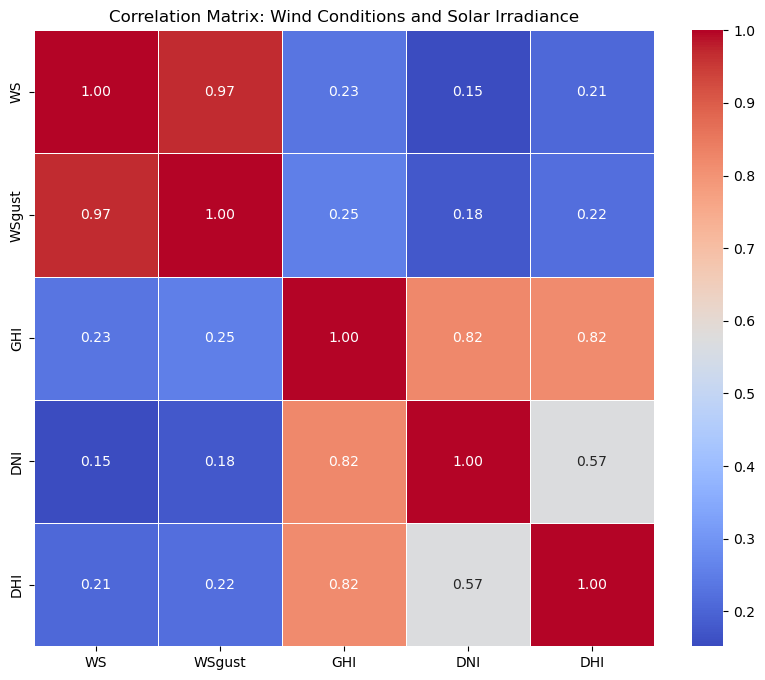

In [40]:
sns.pairplot(data[corr_columns], kind='scatter', markers='o')
plt.suptitle('Pair Plot: Solar Radiation and Temperature', y=1.02)
plt.show()

wind_columns = ['WS', 'WSgust', 'WD']
irradiance_columns = ['GHI', 'DNI', 'DHI']
wind_irradiance_columns = wind_columns + irradiance_columns

sns.pairplot(data[wind_irradiance_columns], kind='scatter', markers='o')
plt.suptitle('Scatter Matrix: Wind Conditions vs Solar Irradiance', y=1.02)
plt.show()

corr_wind_irradiance = data[wind_irradiance_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_wind_irradiance, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, linewidths=0.5)
plt.title('Correlation Matrix: Wind Conditions and Solar Irradiance')
plt.show()


In [43]:
pip install windrose 


Note: you may need to restart the kernel to use updated packages.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525601 non-null  object        
 1   GHI            525601 non-null  float64       
 2   DNI            525601 non-null  float64       
 3   DHI            525601 non-null  float64       
 4   ModA           524414 non-null  float64       
 5   ModB           524452 non-null  float64       
 6   Tamb           525601 non-null  float64       
 7   RH             525601 non-null  object        
 8   WS             525601 non-null  float64       
 9   WSgust         524568 non-null  float64       
 10  WSstdev        525601 non-null  object        
 11  WD             525601 non-null  object        
 12  WDstdev        524568 non-null  float64       
 13  BP             525601 non-null  object        
 14  Cleaning       525601 non-null  object        
 15  

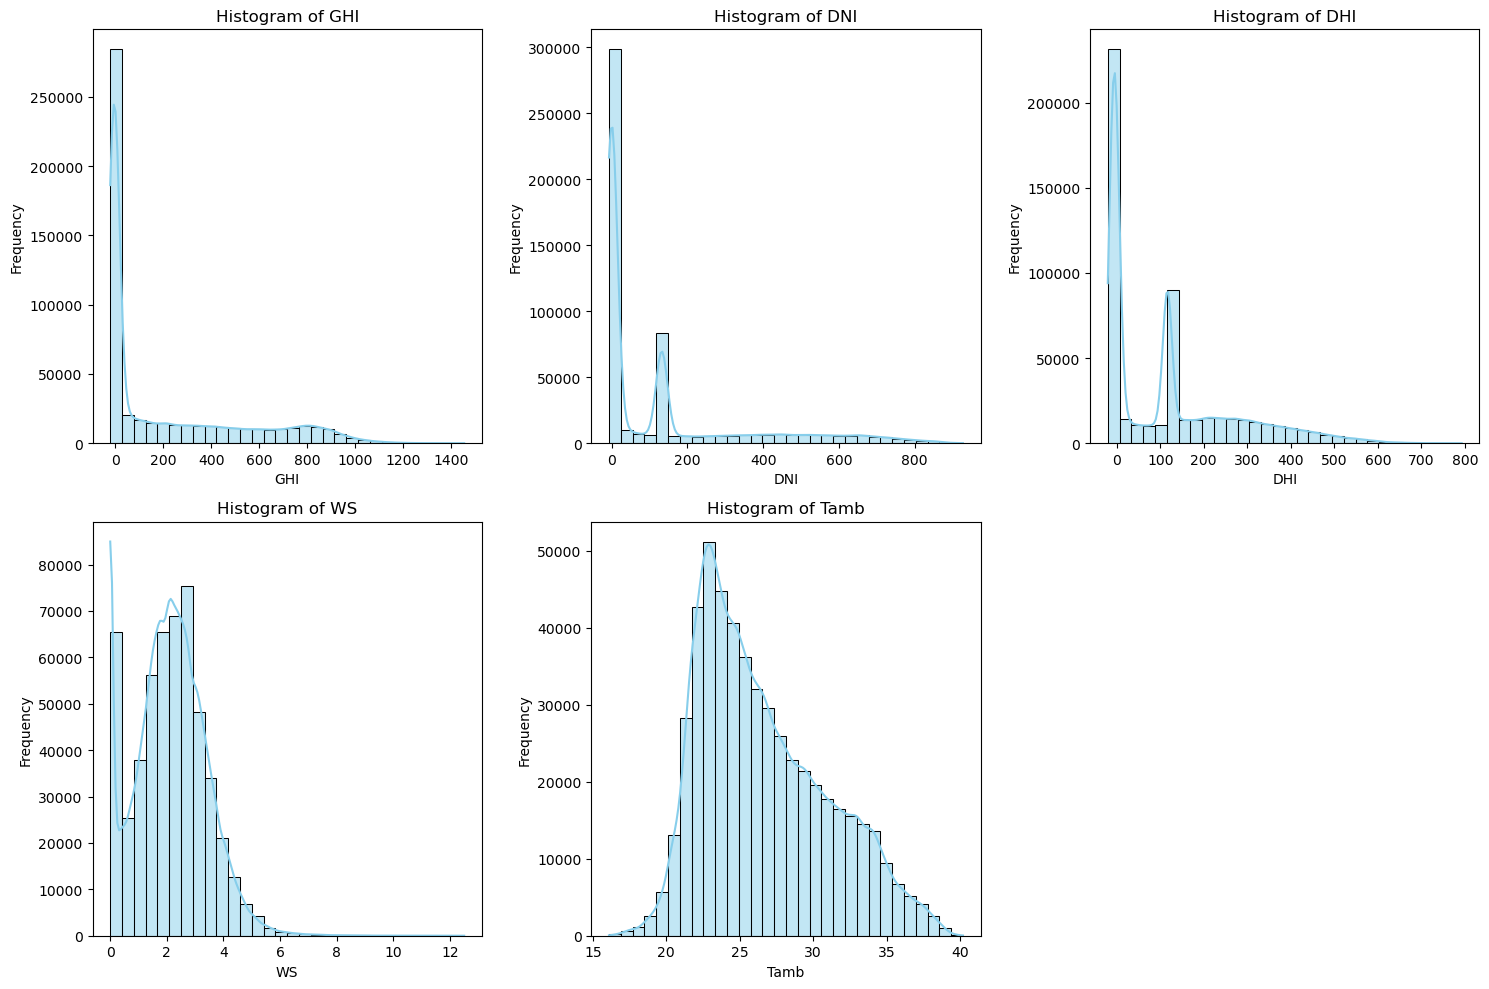

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define your variables of interest
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']

# 1. Convert object columns to numeric
for var in variables:
    data[var] = pd.to_numeric(data[var], errors='coerce')  # Coerce invalid values to NaN

# 2. Handle missing values
# Replace NaN with the mean of each column
for var in variables:
    if data[var].isnull().sum() > 0:  # Check if there are missing values
        data[var].fillna(data[var].mean(), inplace=True)

# 3. Verify data types and missing values
print(data.info())  # Confirm all variables are now numeric
for var in variables:
    print(f"{var} - Missing Values After Cleaning: {data[var].isnull().sum()}")

# 4. Plot histograms for the variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3, i + 1)  # Adjust grid size based on the number of variables
    sns.histplot(data[var], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [56]:

missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

data = data.dropna(axis=1, how='all')  # Drop columns where all values are NaN
print(f"Remaining Columns After Dropping Null Columns: {data.columns.tolist()}")

for col in data.select_dtypes(include=['float64', 'int64']).columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mean(), inplace=True)  # Replace NaN with the column mean

for col in data.select_dtypes(include=['object']).columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)  # Replace NaN with the column mode

from scipy.stats import zscore

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-scores
z_scores = np.abs(zscore(data[numeric_cols]))
outliers = (z_scores > 3)  # Define outliers as Z-scores > 3

# Replace outliers with column median
for col in numeric_cols:
    data.loc[outliers[col], col] = data[col].median()

print("Updated Data Types:\n", data.dtypes)

# 7. Save cleaned dataset
data.to_csv(r"C:\Users\hp\Desktop\10Acedamy\week_0\Data\benin_cleaned_dataset.csv", index=False)


Missing Values in Each Column:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA               1187
ModB               1149
Tamb                  0
RH                    0
WS                    0
WSgust             1033
WSstdev               0
WD                    0
WDstdev            1033
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         447841
datetime         525601
month                 0
day              525601
hour             525601
dtype: int64
Remaining Columns After Dropping Null Columns: ['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments', 'month']


C:\Users\hp\AppData\Local\Temp\ipykernel_5260\3989022613.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(data[col].mean(), inplace=True)  # Replace NaN with the column mean
C:\Users\hp\AppData\Local\Temp\ipykernel_5260\3989022613.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].fillna(data[col].mode()[0], inplace=True)  # Replace NaN with the column mode


Updated Data Types:
 Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH                object
WS               float64
WSgust           float64
WSstdev           object
WD                object
WDstdev          float64
BP                object
Cleaning          object
Precipitation     object
TModA            float64
TModB            float64
Comments          object
month             object
dtype: object
